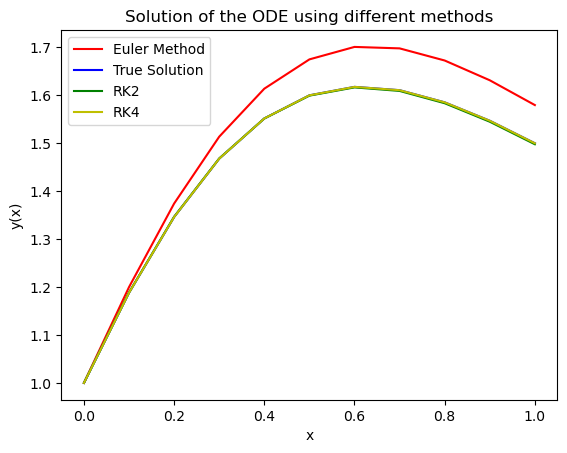

Relative Error for Euler method :  0.2031064444256408
Relative Error for RK2 method :  6.861621417457569e-05
Relative Error for RK4 method :  7.699973864745816e-11


In [50]:
# Problem 5

import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return((2-2*x*y)/(x**2+1))

h = 0.1

def true_soln(x):
    return((2*x+1)/(x**2+1))

np.vectorize(true_soln)

x_arr = np.zeros(11)
for i in range(11):
    x_arr[i] = i*h

y0 = 1
y_arr = np.zeros(11)
y_arr[0]=y0

# Euler Method : 

for i in range (1,len(x_arr)):
    y_arr[i] = y_arr[i-1] + h*f(x_arr[i-1],y_arr[i-1])
    
plt.plot(x_arr,y_arr,c = 'r', label = "Euler Method")
plt.plot(x_arr,true_soln(x_arr),c ='b', label = "True Solution")

# RK2 Method :
def RK2(f,x_arr,y0):
    y_arr=np.zeros(len(x_arr))
    h=x_arr[1]-x_arr[0]
    y_arr[0]=y0
    for i in range(len(x_arr)-1):
        k1=h*f(x_arr[i],y_arr[i])
        k2=h*f(x_arr[i]+(h/2),y_arr[i]+(k1/2))
        y_arr[i+1]=y_arr[i]+k2
    return y_arr
RK2 = np.vectorize(RK2)
plt.plot(x_arr,RK2(f,x_arr,y0),c = 'g',label = "RK2")

# RK4 Method :
def RK4(f,x_arr,y0):
    y_arr=np.zeros(len(x_arr))
    h=x_arr[1]-x_arr[0]
    y_arr[0]=y0
    for i in range(len(x_arr)-1):
        k1=h*f(x_arr[i],y_arr[i])
        k2=h*f(x_arr[i]+(h/2),y_arr[i]+k1/2)
        k3=h*f(x_arr[i]+(h/2),y_arr[i]+k2/2)
        k4=h*f(x_arr[i]+h,y_arr[i]+k3)
        y_arr[i+1]=y_arr[i]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    return y_arr

plt.plot(x_arr, RK4(f,x_arr,y0),c = 'y', label = "RK4")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("Solution of the ODE using different methods")
plt.legend()
plt.show()

def relative_error(a,b):
    return(100*np.sum(np.abs(a-b)**2)/np.sum(np.abs(b)**2))

print ("Relative Error for Euler method : ", relative_error(y_arr,true_soln(x_arr)))
print ("Relative Error for RK2 method : ", relative_error(RK2(f,x_arr,y0),true_soln(x_arr)))
print ("Relative Error for RK4 method : ", relative_error(RK4(f,x_arr,y0),true_soln(x_arr)))

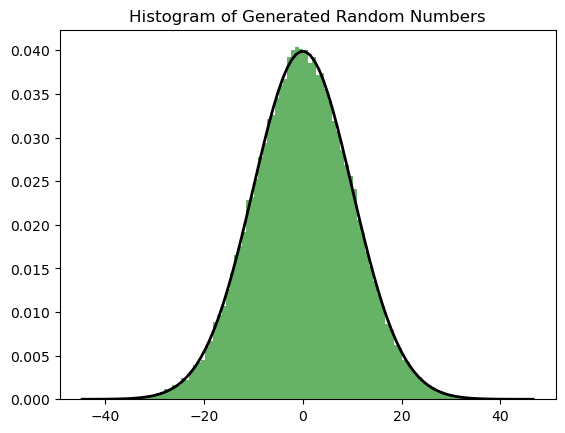

Minimum wave vector is,  0.0
Maximum wave vector is,  3.141592653589793


Text(0, 0.5, 'Binned Power')

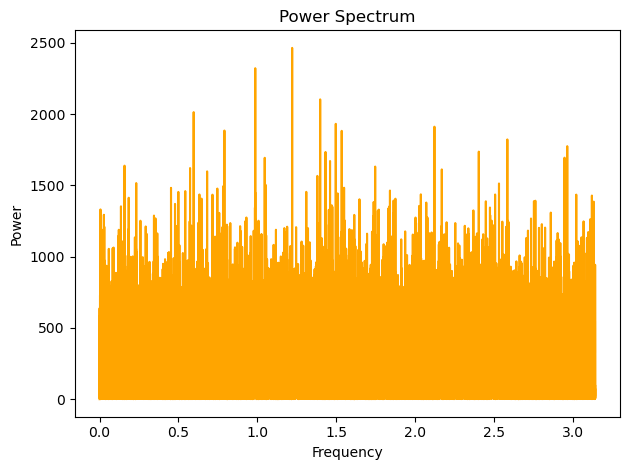

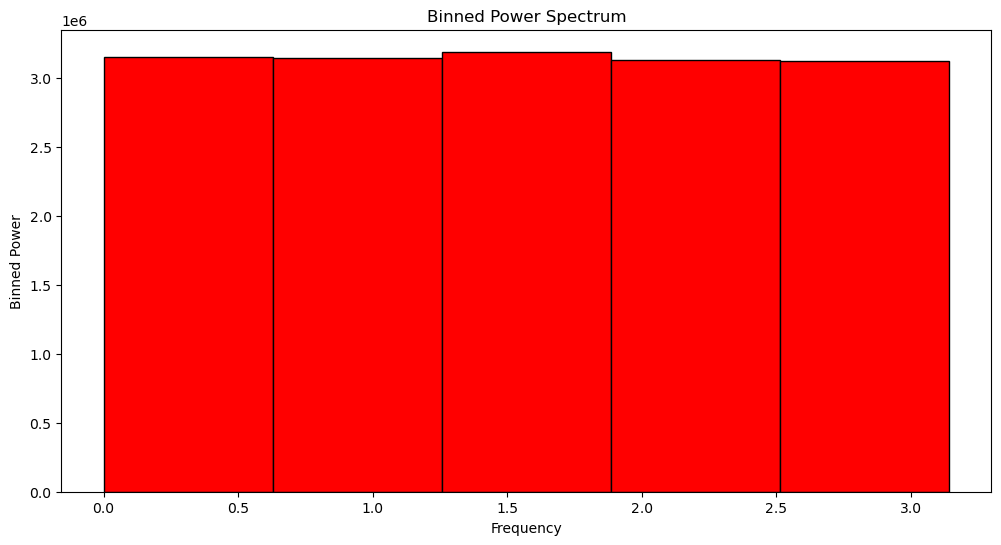

In [47]:
# Problem 6 

import numpy as np
import cmath
from scipy.signal import periodogram

mean = 0
std_dev = 10
num_samples = 100000

data = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

import matplotlib.pyplot as plt

plt.hist(random_numbers, bins=100, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean) / std_dev) ** 2) / (std_dev * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)
title = "Histogram of Generated Random Numbers"
plt.title(title)
plt.show()


N = 100000
dt = 1
time = np.arange(N) * dt

freq = np.fft.fftfreq(N, dt)
dft = np.fft.fft(data, norm="ortho")

freqs_shifted = np.fft.fftshift(2*np.pi*freq)
dft_shifted = np.fft.fftshift(dft)

dft_modified = np.array([dt * np.sqrt(N / (2 * np.pi)) * cmath.exp(-1j * k_q * time[0]) * dft_shifted[i] for i, k_q in enumerate(freqs_shifted)])


frequencies, power_spectrum = periodogram(data)
frequencies *= 2*np.pi

plt.plot(frequencies, power_spectrum, color='orange', label='Power Spectrum')
plt.title('Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

print("Minimum wave vector is, ",frequencies.min())
print("Maximum wave vector is, ",frequencies.max())

num_bins = 5

linear_bins = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)

binned_power_spectrum, _ = np.histogram(frequencies, bins=linear_bins, weights=power_spectrum)

bin_widths = np.diff(linear_bins)
binned_power_spectrum /= bin_widths

bin_centers = (linear_bins[1:] + linear_bins[:-1]) / 2

plt.figure(figsize=(12, 6))
plt.bar(bin_centers, binned_power_spectrum, width=np.diff(linear_bins), align='center', color='red', edgecolor='black')
plt.title('Binned Power Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Binned Power')

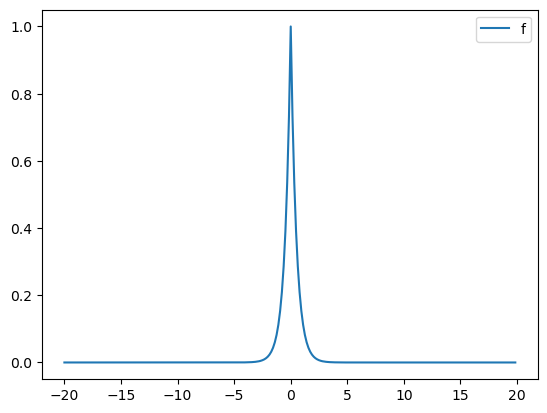

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16820\947303081.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
  ft_arr[i]= ((40/n)*np.sqrt(n/(2*np.pi))*np.exp(-(1j)*k_arr[i]*x_min)*(dft_arr[i]))


Text(0, 0.5, 'fourier transform')

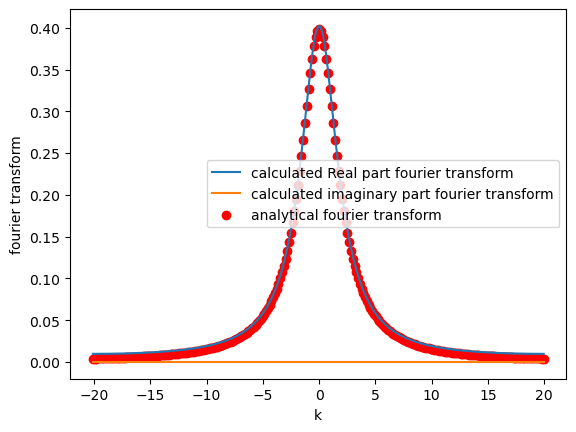

In [61]:
# Problem 10

import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return(np.exp(-2*np.abs(x)))
f = np.vectorize(f)

x_min = -20
x_max = 20
n = 256
x_arr = []
for i in range (n):
    x_arr.append(-20 + (40/n)*i)
x_arr = np.array(x_arr)
plt.plot(x_arr,f(x_arr),label = "f")
plt.legend()
plt.show()
dft_arr = np.fft.fft(f(x_arr),norm = "ortho")
k_arr =2*np.pi* np.fft.fftfreq(n,(40/n))
ft_arr = np.zeros(len(k_arr))

for i in range(len(k_arr)):
    ft_arr[i]= ((40/n)*np.sqrt(n/(2*np.pi))*np.exp(-(1j)*k_arr[i]*x_min)*(dft_arr[i]))

def pairsort(arr1, arr2):
    pairs = [(arr1[i], arr2[i]) for i in range(len(arr1))]
    sorted_pairs = sorted(pairs, key=lambda x: x[0])
    sorted_arr2 = [pair[1] for pair in sorted_pairs]
    
    return sorted_arr2



plt.plot(np.sort(k_arr),np.real(pairsort(k_arr,ft_arr)),label = "calculated Real part fourier transform")
plt.plot(np.sort(k_arr),np.imag(pairsort(k_arr,ft_arr)),label = "calculated imaginary part fourier transform")


def true_soln(k):
    return(np.sqrt(8/np.pi)/(k**2+4))
true_soln = np.vectorize(true_soln)

plt.scatter(k_arr,true_soln(k_arr),color = "red",label = "analytical fourier transform")
plt.grid
plt.legend()
plt.xlabel("k")
plt.ylabel("fourier transform")
